# 코스피, 코스닥, 코스닥, 선물에 대한 일별 과거 시세 페이지 분석

### 먼저 분석하고자 하는 지표를 위한 값을 설정

In [1]:
# kospi = 'KOSPI', kosdoq = 'KOSDAQ', kospi200 = 'KPI200', future = 'FUT' 
# 아레 값 중 하나를 index_cd에 대입, 아래 값들은 URL에서 표시 되는 스트링들

kospi = 'KOSPI'
kosdoq = 'KOSDAQ'
kospi200 = 'KPI200'
future = 'FUT' 

# ----------------------------------------------> 값 입력 

index_cd = kospi
page_n = 1

# 각 지수에 대해 최종가를 보여주는 화면 중 첫 번째(최신) 화면을 가르킴
# 데이더가 있는 url을 장확히 확인 하는 방법은 먼저 naver 국내 증시 -> 주요시세 정보 중 원하는 지표를
# 선택한 후 일변 시세에서 화면 오른쪽 클릭 후 view frame source(크롬기준)을 선택하면 브라우저의
# 주소 창에 view-source:https://finance.naver.com/sise/sise_index_day.nhn?code=KOSPI&page=1 이러한 
# 내용이 있음을 확인 할 수 있다.

naver_index = 'http://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + '&page=' + str(page_n)

In [2]:
# urlopen : 해당 url주소의 내용을 raw 형식으로 가져올 수 있는 함수 
# 이 때 가져오는 url이 전체 화면이 아닌 frame의 주소인 경우 frame에 포함된 내용만 가져온다.
# naver 지수 표시의 경우 frame내 6일 치의 날짜/종가/전일비/등락율/거래량/거래대금 의 내용이 들어 있다.

from urllib.request import urlopen  
source = urlopen(naver_index).read()
source

b'<html lang="ko">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\n<title>\xb3\xd7\xc0\xcc\xb9\xf6 \xc1\xf5\xb1\xc7</title>\n\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230502113716/css/newstock.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230502113716/css/common.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230502113716/css/layout.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230502113716/css/main.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230502113716/css/newstock2.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230502113716/css/newstock3.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230502113716/css/wor

In [3]:
# url 내용을 tag 형식으로 해석 할 수 있게 도와 주는 bs4 모듈을 import하고 BeautifulSoup 함수로 적용

import bs4
source = bs4.BeautifulSoup(source, 'lxml')
source

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>네이버 증권</title>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20230502113716/css/newstock.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20230502113716/css/common.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20230502113716/css/layout.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20230502113716/css/main.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20230502113716/css/newstock2.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20230502113716/css/newstock3.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20230502113716/css/world.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<script src="https

In [4]:
# 실제로 적용되었는지 내용 확인을 위해 prettify 함수로 확인, 위에서 처럼 그냥 source를 쳐서 확인도 가능

print(source.prettify())

<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   네이버 증권
  </title>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20230502113716/css/newstock.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20230502113716/css/common.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20230502113716/css/layout.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20230502113716/css/main.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20230502113716/css/newstock2.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20230502113716/css/newstock3.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20230502113716/css/world.css" rel="stylesheet" type="text/css"/>
 </head

In [5]:
# 테이블에 있는 데이터를 가져와야 하는데 각각의 데이터들이 어떻게 구성되어 있는지는 
# 일일시세와 같은 frame화면에 오른쪽 클릭을 한 후 inspect(검사)를 하게 되면 테이블에 표시되는 
# 각각의 엘리먼트들이 어떻게 source 상에서 대응되는지를 쉽게 확인 가능, 오른쪽의 element 화면에서
# td와 같은 태그를 클릭하면 왼쪽 web화면의 어떤 인자와 대응되는지 반전되어 표시해 준다.

# td라는 변수에 tag중 <td> ... </td> 로 되어 있는 것들을 인자로 해서 리스트 변수로 저장한다.
# len 행수로 그러한 인자들이 몇개 인지 확인

td = source.find_all('td')
len(td)

54

In [6]:
# td 리스트 내용을 확인
td

[<td class="blank_07" colspan="6"></td>,
 <td class="date">2023.05.15</td>,
 <td class="number_1">2,465.85</td>,
 <td class="rate_down" style="padding-right:35px;">
 <img alt="하락" height="6" src="https://ssl.pstatic.net/imgstock/images/images4/ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
 				9.57
 				</span>
 </td>,
 <td class="number_1">
 <span class="tah p11 nv01">
 				-0.39%
 				</span>
 </td>,
 <td class="number_1" style="padding-right:40px;">381,946</td>,
 <td class="number_1" style="padding-right:30px;">5,155,588</td>,
 <td class="date">2023.05.12</td>,
 <td class="number_1">2,475.42</td>,
 <td class="rate_down" style="padding-right:35px;">
 <img alt="하락" height="6" src="https://ssl.pstatic.net/imgstock/images/images4/ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
 				15.58
 				</span>
 </td>,
 <td class="number_1">
 <span class="tah p11 nv01">
 				-0.63%
 				</span>
 </td>,
 <td class="number_1" style="pad

날짜 추출 (python 돌리는 시점의 날짜(오늘)

In [7]:
# 화면에 표시되는 특정 값이 html 소스상에서 어떤 태그로 구성되고 또 몇 번째 태그인지를
# 확인 하는 방법(매우 중요)
# inspect 화면에서 사용하고자 하는 태그 소스(반전됨)에 우클릭한 뒤 copy -> copy XPath 를  한 후
# 메모장 같은 곳에 붙이기를 아면 아래와 같은 path를 보여준다 (이 예는 테이블 내에서 오늘 날짜에 대한 path)
# /html/body/div/table[1]/tbody/tr[3]/td[1]
# 여기서 frame의 내용은 table 부터 시작한다고 뵈야하고 tbody의 경우 table의 내용이 시작된다는 것으로
# 무시하면 되고 이 후 tr,td의 순서를 통해 원하는 인자값을 찾을 수 있다. 찾는 방법은 찾는 값이 하나이면
# find('tag명'), 여러개인 경우는 find_all('tag명')[순서] 를 사용하는데 xpath로 표시된 값에서 -1을 해준다.
# 아래는 최신 날짜의 위치를 xpath를 통해서 가져 온 것
#/html/body/div[1]/table[1]/tbody/tr[3]/td[1]

print(source.find_all('table'))
print("-----------------------------------------")
print(source.find_all('table')[0])
print("-----------------------------------------")
print(source.find_all('table')[0].find_all('tr')[2])
print("-----------------------------------------")

# 아래의 의미는 table이라는 tag가진 것중 첫 번째 안에 tr 태크를 가지것 중 3번째 내의 td 인자중 
# 첫번째 내용을 리스트 중 찾아 내는 것임
source.find_all('table')[0].find_all('tr')[2].find_all('td')[0]


[<table cellpadding="0" cellspacing="0" class="type_1" summary="일별 시세표:날짜에 따른 체결가 전일비 등락률 거래량 거래대금 정보를 제공합니다.">
<caption>일별시세</caption>
<col width="15%"/><col width="14%"/><col width="18%"/><col width="14%"/><col width="*"/><col width="18%"/>
<tr>
<th>날짜</th>
<th>체결가</th>
<th>전일비</th>
<th>등락률</th>
<th>거래량<span class="add_txt">(천주)</span></th>
<th>거래대금<span class="add_txt">(백만)</span></th>
</tr>
<tr><td class="blank_07" colspan="6"></td></tr>
<tr>
<td class="date">2023.05.15</td>
<td class="number_1">2,465.85</td>
<td class="rate_down" style="padding-right:35px;">
<img alt="하락" height="6" src="https://ssl.pstatic.net/imgstock/images/images4/ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
				9.57
				</span>
</td>
<td class="number_1">
<span class="tah p11 nv01">
				-0.39%
				</span>
</td>
<td class="number_1" style="padding-right:40px;">381,946</td>
<td class="number_1" style="padding-right:30px;">5,155,588</td>
</tr>
<tr>
<td class="date">2023.05.12</t

<td class="date">2023.05.15</td>

In [8]:
# test : td 태그를 가지고 있고 이중 class 이름이 'date' 로 되어 있는 것만 리스트 변수에 넣어서 표시
print(source.find_all('td', class_='date'))

# 첫 번째 인자가 최신 날짜임을 아는 상태에서 [0]으로 지정하고 .text는 해당 tag 사이에 있는 값을 보여 준다.
d = source.find_all('td', class_='date')[0].text
d

[<td class="date">2023.05.15</td>, <td class="date">2023.05.12</td>, <td class="date">2023.05.11</td>, <td class="date">2023.05.10</td>, <td class="date">2023.05.09</td>, <td class="date">2023.05.08</td>]


'2023.05.15'

In [9]:
# python용 날자 형식으로 바꿔주기 위한 모듈 import

import datetime as dt

In [10]:
# 문자열.split(구분자) 를 이용하여 각각의 나누고 []로 각 인자를 access해서 integer 값으로 저장
# test
print(d.split('.'))

yyyy = int(d.split('.')[0]) 
mm = int(d.split('.')[1])
dd = int(d.split('.')[2])

this_date= dt.date(yyyy, mm, dd)
this_date
print(this_date)

['2023', '05', '15']
2023-05-15


날짜정보를  date 타입으로 변경하는 함수 정의

In [11]:
# yyyy.mm.dd 형태로 구성된 날짜 정보를 datetime.date의 형태로 만들어서 리턴한다.

def date_format(d):
    d = str(d).replace('-', '.')
    
    yyyy = int(d.split('.')[0]) 
    mm = int(d.split('.')[1])
    dd = int(d.split('.')[2])

    this_date= dt.date(yyyy, mm, dd)
    return this_date

종가 추출

In [12]:
# 종가에 대해서 xpath를 해 보면 아래와 같은 값으로 표시된다. (최신 날짜에 대한 종가임 tr[2].td[1])

# /html/body/div[1]/table[1]/tbody/tr[3]/td[2]  => 전체 화면일 떄
# /html/body/div/table[1]/tbody/tr[3]/td[2] => 해당 frame만 따로 로딩한 상태에서 볼때. 차이는 div 부분 밖에 없다

In [13]:
# tr 태그로 표시되는 인자중 3번째의 내부에 td 인자 중 두번 째에 위치한 값을 this_close에 넣는다. 스트링 값으로 들어감
# 가격 정보에 천자리 이상에 사용하는 쉼표를 없애준 후 floating 변수로 만들어 준다.

this_close = source.find_all('tr')[2].find_all('td')[1].text
this_close = this_close.replace(',', '')
this_close = float(this_close)
this_close

2465.85

In [14]:
# 다른 방식으로 화면에 표시된 첫번째 종가를 가져오는 방법, inspect에서 오늘자 종가가 td 태그와 class='number_1' 으로 필터링한
# 값들 중 첫번 째 값임을 알 수 있으므로 아래와 같이 간단히 찾을 수도 있다.
p = source.find_all('td', class_='number_1')[0].text
p
# index를 4만큼 떨어진 곳을 accessing해서 다음 번(바로 직전 날짜) 종가를 가져 올 수 있다.
#print(source.find_all('td', class_='number_1')[4].text)

'2,465.85'

페이지 상의 날짜와 종가정보 전체 추출

In [15]:
# 현재 화면(frame)에 표시된 6일치 정보에 대해서 class_ filter를 이용해서 필요한 정보만 리스트에 저장
# 전일비 값은 class_='rate_down' 이여서 아래 변수(prices)에는 저장되지 않음

dates = source.find_all('td', class_='date')
prices = source.find_all('td', class_='number_1')

In [16]:
# frame에서 보여지는 정보는 몇 개의 행으로 이루어 졌는지 확인 (6개)
len(dates)
#dates

6

In [17]:
# td 태그중 class가 number_1인 것을 모두 리스트 형태로 저장
len(prices)
#prices

24

In [18]:
# 6회 반복을 한다 (테이블의 행의 수와 동일)
for n in range(len(dates)):
    this_date = dates[n].text
    this_date = date_format(this_date)
    
    # td 태크 class가 number_1인 것 중 최종가 관련된 엘리먼트는 0, 4, 8, 12 .. 와 같은 순서로 들어 있는 것을
    # 크롬 브라우져 inspect에 표시된 것을 통해서 확인 가능하고 위에서 prices 를 표시해서도 확인 가능
    this_close = prices[n*4].text
    this_updown = prices[n*4+1].text
    # 0, 4, 8, ... 4의 배수로 돌아가는 가격 추출 
    # 천자리 표시인 쉼표를 지워주고 floating 형식으로 저장 하고 날짜하고 해당 날짜의 종가를 프린트
    this_close = this_close.replace(',', '')
    this_close = float(this_close)
    this_close
    
    print(this_date, this_close, this_updown)

2023-05-15 2465.85 

				-0.39%
				

2023-05-12 2475.42 

				-0.63%
				

2023-05-11 2491.0 

				-0.22%
				

2023-05-10 2496.51 

				-0.54%
				

2023-05-09 2510.06 

				-0.13%
				

2023-05-08 2513.21 

				+0.49%
				



마지막 페이지 번호 찾기

In [19]:
# frame 화면에 나오는 정보 중 맨뒤 라는 곳을 우클릭 후 inspect 하고 element 화면에서 반전된
# 부분을 다시 우클릭 후 copy -> copy Xpath 하면 아래와 같은 path를 확인 가능
# /html/body/div/table[2]/tbody/tr/td[12]/a   ->  KOSPI로 했을 때
# /html/body/div/table[2]/tbody/tr/td[7]/a    -> KOSPI200으로 했을 때

In [20]:
# 위에서 보면 어떤 지표를 보는지에 따라 테이블 구성의 td 값의 index(12 or 7)가 바뀔  수 있으므로
# td에서 사용한 class가 유일한 것(pgRR) 을 이용하여 필요한 정보를 추출한다.
# pgRR을 class로 쓰는 항목이 유일하므로 find_all 대신 find를 쓰고 [] 배열 인자를 쓰지 않고 직접 억세스
# 태그가 td에서 class가 pgRR인 것을 찾아내고 그안에 tag가 a인 것에서 href를 대응하는 값을 찾아낸다.(이 부분 주목)
paging = source.find('td', class_='pgRR').find('a')['href']
#print(source.find('td', class_='pgRR'))
#print(source.find('td', class_='pgRR').find('a'))
#print(source.find('td', class_='pgRR').find('a').text)
paging

'/sise/sise_index_day.nhn?code=KOSPI&page=1443'

In [21]:
# 추출 된 정보 중 마지막 page index 값(시간이 흘러감에 따라 증가)만이 필요하므로 &를 기준으로
# 뒤의 것만 가져온다. 
paging = paging.split('&')[1]
paging

'page=1443'

In [22]:
# 숫자만 가져오기 위해서 =를 기준으로 뒤의 것만 가져 온다
paging = paging.split('=')[1]
paging

'1443'

In [23]:
# 아래가 원래 코드 : KOSPI200 기준으로 한것 같은데 직접 값을 넣는 방식으로 함
# naver_index = 'http://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + '&page=' + str(505)

naver_index = 'http://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + '&page=' + paging

print(naver_index)

source = urlopen(naver_index).read()
source = bs4.BeautifulSoup(source, 'lxml')

# class pgRR은 맨 마지막 페이지의 경우에만 나오는 class이다. 다른 page들에서는 나오지 않는다.
# url 내용에서 아래를 확인해서 참인 경우에만 진행한다. 즉 last_page에 integer형으로 마지막 페이지의
# 인덱스 값을 저장한다.
if source.find('td', class_='pgRR'):
    last_page = source.find('td', class_='pgRR').find('a')['href']
    last_page = last_page.split('&')[1]
    last_page = last_page.split('=')[1]
    last_page = int(last_page)

http://finance.naver.com/sise/sise_index_day.nhn?code=KOSPI&page=1443


In [24]:
# page_n을 1로 하면 최신 정보를 다 포함하도록 함

def historical_index_naver(index_cd, page_n=1, last_page=0):   
        
    naver_index = 'http://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + '&page=' + str(page_n)
       
    source = urlopen(naver_index).read()         # 지정한 페이지에서 코드 읽기
    source = bs4.BeautifulSoup(source, 'lxml')   # 뷰티풀 스프로 태그별로 코드 분류
    
    # 현재 보이는 하나의 화면 단위(테이블 하나) 에서 추출
    dates = source.find_all('td', class_='date')         # <td class="date">태그에서 날짜 수집   
    prices = source.find_all('td', class_='number_1')    # <td class="number_1">태그에서 지수 수집
    
    for n in range(len(dates)):
    
        if dates[n].text.split('.')[0].isdigit():
            
            # 날짜 처리
            this_date = dates[n].text
            this_date= date_format(this_date)
            
            # 종가 처리
            this_close = prices[n*4].text   # prices 중 종가지수인 0,4,8,...번째 데이터 추출
            this_close = this_close.replace(',', '')
            this_close = float(this_close)

            # 딕셔너리에 저장 (날짜(key)에 대응해서 종가(value) 대입)
            historical_prices[this_date] = this_close
            
    # 페이지 네비게이션
    if last_page == 0:
        last_page = source.find('td', class_='pgRR').find('a')['href']
        # 마지막페이지 주소 추출
        last_page = last_page.split('&')[1]   # & 뒤의 page=506 부분 추출
        last_page = last_page.split('=')[1]   # = 뒤의 페이지번호만 추출
        last_page = int(last_page)   # 숫자형 변수로 변환
        
    # 다음 페이지 호출
    if page_n < last_page:   
        page_n = page_n + 1   
        historical_index_naver(index_cd, start_date, end_date, page_n, last_page)   
        
    return historical_prices  

네이버에서 일자별 인덱스를 추출하는 함수 정의
아래 따옴표 안의 값을 넣어서 다양하게 사용 가능
해외 지수의 경우 url 구조가 국내지수와 달라서 다른 함수 필요
kospi = 'KOSPI', kosdoq = 'KOSDAQ', kospi200 = 'KPI200', future = 'FUT' 

In [25]:
def historical_index_naver(index_cd, start_date='', end_date='', page_n=1, last_page=0):
    
    if start_date:   # start_date가 있으면
        start_date = date_format(start_date)   # date 포맷으로 변환
    else:    # 없으면
        start_date = dt.date.today()   # 오늘 날짜를 지정
    if end_date:   
        end_date = date_format(end_date)   
    else:   
        end_date = dt.date.today()  
        
        
    naver_index = 'http://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + '&page=' + str(page_n)
    
    source = urlopen(naver_index).read()         # 지정한 페이지에서 코드 읽기
    source = bs4.BeautifulSoup(source, 'lxml')   # 뷰티풀 스프로 태그별로 코드 분류
    
    dates = source.find_all('td', class_='date')        # <td class="date">태그에서 날짜 수집   
    prices = source.find_all('td', class_='number_1')   # <td class="number_1">태그에서 지수 수집
    
    # 아래에서 this_data는 page_n = 1에서 나온 date를 사용하기 때문에 오늘 날짜 포함 6개의 이전 날자들을 포함(최신)
    # 이 후로 historical_index_naver함수가 page_n값을 증가(다음 페이지) 시키면서 점점 날짜(this_date)는 과거로 가게 되고
    # this_data이 start_date을 지나 더 과거로 가게 되는 순간 지금까지 저장된 dic값을 리턴하고 종료
    
    # 특정 시점이후 데이터가 없는 경우(선물의 경우)가 발생하면 naver_index에 의해 urlopen이 fail이 나거나
    # 문제가 없더라도 source내에는 우리가 원하는 data가 들어 있지 않을 것이다. 그런 상태에서 dates와 prices를
    # 추출하는 것이 의미 없기는 하겠지만 일단 추출한다 해도 dates의 값은 Null로 td나 class관련해서 아무 것도 없게 될 것이고
    # 그것은 len(dates)가 0이 되어 딕션너리에 아무런 저장을 하지 않겠지만 page_n == last_page가 될 때까지 
    # 쓸데 없이 반복 호출 되는 비효율적인면을 개선할 필요가 있다. (위쪽에 체크 루틴을 넣어 주면 좋을 듯)
    for n in range(len(dates)):
    
        if dates[n].text.split('.')[0].isdigit():
            
            # 날짜 처리
            this_date = dates[n].text
            this_date= date_format(this_date)
            
            if this_date <= end_date and this_date >= start_date:   
            # start_date와 end_date 사이에서 데이터 저장
                # 종가 처리
                this_close = prices[n*4].text   # prices 중 종가지수인 0,4,8,...번째 데이터 추출
                this_close = this_close.replace(',', '')
                this_close = float(this_close)

                # 딕셔너리에 저장
                historical_prices[this_date] = this_close
                
            elif this_date < start_date:   
            # start_date 이전이면 함수 종료 (설정한 시작점 보다 더 과거의 data는 더 이상 처리 하지 않는다)
                return historical_prices              
            
    # 페이지 네비게이션 : 매번 재귀호출 때마다 반복 실행 시킬 필요 없을 것 같은데.. 구조 잘 못 짠것 같음
    if last_page == 0:
        last_page = source.find('td', class_='pgRR').find('a')['href']
        # 마지막페이지 주소 추출
        last_page = last_page.split('&')[1]   # & 뒤의 page=506 부분 추출
        last_page = last_page.split('=')[1]   # = 뒤의 페이지번호만 추출
        last_page = int(last_page)   # 숫자형 변수로 변환
        
    # 다음 페이지 호출
    if page_n < last_page:   
        page_n = page_n + 1   
        historical_index_naver(index_cd, start_date, end_date, page_n, last_page)   
    
    # 이것이 호출 된다는 것은 page_n == last_page 인 경우이다.
    return historical_prices  

In [26]:
# index_cd 는 위에서 사용하던 것을 그대로 쓰면 된다. 여기서 따로 다시 정의 하는 이유는 위에 test용이 아닌 함수 형태로
# historical prices를 가져 오는 함수를 정의 했으므로 이것을 바로 써주는 것이 좋을 수 있기 때문
# 이 함수 (historical_index_naver)를 사용함에 있어서의 문제점은 재귀 호출을 해야 하기 때문에
# 전역변수 historical_prices = dict() 을 함수 사용전에 반드시 호출 해 주어야 한다. 그래야 해당 전역변수에 데이터가
# 저장되고 그 값을 직접 쓰던지 아니면 return을 해서 새로운 dic에 저장해서 쓰는 방식을 이용해야 한다.

#index_cd = 'KPI200'
historical_prices = dict()
#historical_index_naver(index_cd, '2018-1-1', '2018-7-1')
my_own_dic = historical_index_naver('KOSDAQ', '2018-1-1', '2018-3-1')
my_own_dic
#historical_prices

{datetime.date(2018, 2, 28): 857.06,
 datetime.date(2018, 2, 27): 874.01,
 datetime.date(2018, 2, 26): 874.43,
 datetime.date(2018, 2, 23): 874.78,
 datetime.date(2018, 2, 22): 870.22,
 datetime.date(2018, 2, 21): 875.58,
 datetime.date(2018, 2, 20): 864.41,
 datetime.date(2018, 2, 19): 875.81,
 datetime.date(2018, 2, 14): 848.03,
 datetime.date(2018, 2, 13): 829.39,
 datetime.date(2018, 2, 12): 843.24,
 datetime.date(2018, 2, 9): 842.6,
 datetime.date(2018, 2, 8): 861.94,
 datetime.date(2018, 2, 7): 829.96,
 datetime.date(2018, 2, 6): 858.17,
 datetime.date(2018, 2, 5): 858.22,
 datetime.date(2018, 2, 2): 899.47,
 datetime.date(2018, 2, 1): 908.2,
 datetime.date(2018, 1, 31): 913.57,
 datetime.date(2018, 1, 30): 920.96,
 datetime.date(2018, 1, 29): 927.05,
 datetime.date(2018, 1, 26): 913.12,
 datetime.date(2018, 1, 25): 898.6,
 datetime.date(2018, 1, 24): 894.77,
 datetime.date(2018, 1, 23): 894.43,
 datetime.date(2018, 1, 22): 873.09,
 datetime.date(2018, 1, 19): 879.99,
 datetime.d

# 다음에서 해외지수 추출

In [27]:
# 실제 view frame을 통해서 url을 보면 page 부분이 ? 앞쪽에 위치 하는데 이부분은 &를 이용해 아무런
# 위치에 두어도 큰 문제가 없다 그러므로 아래와 같은 url로 쓰는 것도 가능

url = 'http://finance.daum.net/global/index_daily.daum?type=default&ric=/.GSPC&page=1' 
    
source = urlopen(url).read()
source = bs4.BeautifulSoup(source, 'lxml')

In [28]:
dates = source.find_all('td', class_='datetime')
dates

[]

In [29]:
prices = source.find_all('td', class_='num')
print(len(dates))
print(len(prices))

0
0


In [30]:
prices[0].text

IndexError: list index out of range

In [ ]:
def historical_global_daum(index_cd, start_date='', end_date='', page_n=1, last_page=0):
    
    if start_date:   # start_date가 있으면
        start_date = date_format(start_date)   # date 포맷으로 변환
    else:    # 없으면
        start_date = dt.date.today()   # 오늘 날짜를 지정
    if end_date:  
        end_date = date_format(end_date)   
    else:   
        end_date = dt.date.today()  
    
    url = 'http://finance.daum.net/global/index_daily.daum?type=default&ric=/.' + index_cd + '&page=' + str(page_n)

    source = urlopen(url).read()
    source = bs4.BeautifulSoup(source, 'lxml')

    dates = source.find_all('td', class_='datetime')   # <td class="datetime">태그에서 날짜 수집
    prices = source.find_all('td', class_='num')   # <td class="num">태그에서 날짜 수집

    rows_in_page = len(dates)

    # 데이터가 없는 경우는 바로 dic값 가지고 리턴
    # 일반적으로 10일 것이고 마지막 페이지만 행이 10 이하일 가능성이 높다.
    if len(dates) > 0:

        for n in range(rows_in_page):

            # 날짜 처리
            this_date = dates[n].text
            this_date= date_format(this_date)

            if this_date <= end_date and this_date >= start_date:   
            # start_date와 end_date 사이에서 데이터 저장
                # 종가 처리, 0, 3, 6, 9와 같은 순서로 종가를 가진 index이며 실제 내용에 종가 외에
                # 천단위 외에 다양한 \t, \n과 같은 데이터들이 있으므로 그것들을 지워준다.
                this_close = prices[n*3].text
                this_close = this_close.replace(' ', '')
                this_close = this_close.replace('\t', '')
                this_close = this_close.replace('\n', '')
                this_close = this_close.replace(',', '')
                this_close = float(this_close)

                # 딕셔너리에 저장
                historical_prices[this_date] = this_close
                
            elif this_date < start_date:   
            # start_date 이전이면 함수 종료
                return historical_prices                         
        
        # 페이지 네비게이션
        # 다음은 페이지당 행이 10개가 기본임 그러므로 10 인 경우는 다음번 페이지로 진행이 가능함.
        # 10이 아닌 경우는 마지막 페이지일 것이므로 return한다.
        if rows_in_page == 10:
            page_n = int(page_n)
            page_n = page_n + 1
            
            historical_global_daum(index_cd, start_date, end_date, page_n, last_page)
            
    return historical_prices  

In [ ]:
# historical_prices 변수는 historical_global_daum 내부에서 사용하는 변수 이름과 동일 해야 한다.

historical_prices = dict()
daum = historical_global_daum('GSPC', '2018-4-1', '2018-4-5')
daum

# 만들어둔 함수를 이용해 KOSPI200과 S&P500 지수 추출

In [31]:
index_cd = 'KPI200'
historical_prices = dict()
kospi200 = historical_index_naver(index_cd, '2017-1-1', '2017-12-31')

In [32]:
index_cd = 'GSPC'
historical_prices = dict()
sp500 = historical_global_daum(index_cd, '2017-1-1', '2017-12-31')

NameError: name 'historical_global_daum' is not defined

In [ ]:
# key값을 각각 S&P500과 KOSPI200으로 해서 해당 기간동안의 날짜:종가 dic 자료형을 다시 tmp 라는
# 디션너리에 넣는다.
tmp = {'S&P500':sp500, 'KOSPI200':kospi200}
tmp

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(tmp)
df

In [ ]:
df = df.fillna(method='ffill')
if df.isnull().values.any():
    df = df.fillna(method='bfill')
df

In [ ]:
df.head()

In [40]:
index_cd = 'KPI200'
historical_prices = dict()
kospi200 = historical_index_naver(index_cd, '2008-1-1', '2017-12-31')

In [41]:
index_cd = 'GSPC'
historical_prices = dict()
sp500 = historical_global_daum(index_cd, '2008-1-1', '2017-12-31')

In [42]:
tmp = {'S&P500':sp500, 'KOSPI200':kospi200}

In [43]:
df = pd.DataFrame(tmp)
df

,S&P500,KOSPI200
2008-01-02,1447.16,235.30
2008-01-03,1447.16,234.67
2008-01-04,1411.63,235.77
2008-01-07,1416.18,231.00
2008-01-08,1390.19,230.34
2008-01-09,1409.13,232.53
2008-01-10,1420.33,229.47
2008-01-11,1401.02,224.41
2008-01-14,1416.25,222.81
2008-01-15,1380.95,220.91


In [44]:
df = df.fillna(method='ffill')
if df.isnull().values.any():
    df = df.fillna(method='bfill')
df

,S&P500,KOSPI200
2008-01-02,1447.16,235.30
2008-01-03,1447.16,234.67
2008-01-04,1411.63,235.77
2008-01-07,1416.18,231.00
2008-01-08,1390.19,230.34
2008-01-09,1409.13,232.53
2008-01-10,1420.33,229.47
2008-01-11,1401.02,224.41
2008-01-14,1416.25,222.81
2008-01-15,1380.95,220.91


# matplotlib를 이용해 그래프 그리기

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

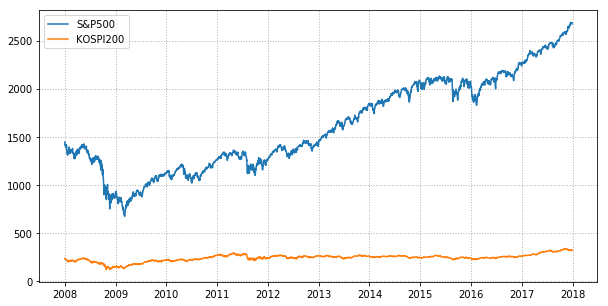

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(df['S&P500'])
plt.plot(df['KOSPI200'])
plt.legend(loc=0)
plt.grid(True, color='0.7', linestyle=':', linewidth=1)

In [47]:
df.iloc[0]

S&P500      1447.16
KOSPI200     235.30
Name: 2008-01-02, dtype: float64

In [48]:
df.loc[dt.date(2008, 1, 2)]

S&P500      1447.16
KOSPI200     235.30
Name: 2008-01-02, dtype: float64

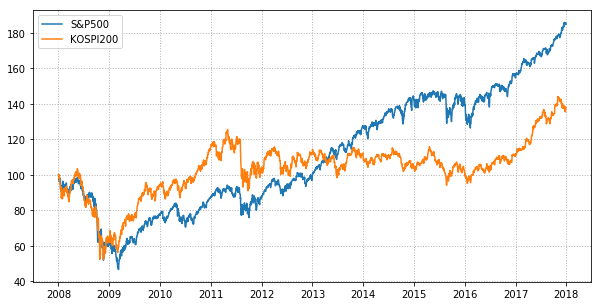

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(df['S&P500'] / df['S&P500'].loc[dt.date(2008, 1, 2)] * 100)
plt.plot(df['KOSPI200'] / df['KOSPI200'].loc[dt.date(2008, 1, 2)] * 100)
plt.legend(loc=0)
plt.grid(True, color='0.7', linestyle=':', linewidth=1)

In [50]:
df_ratio_2016_now = df.loc[dt.date(2016, 1, 1):] / df.loc[dt.date(2016, 1, 4)] * 100
df_ratio_2016_now.head(3)

,S&P500,KOSPI200
2016-01-04,100.000000,100.000000
2016-01-05,100.201226,100.639304
2016-01-06,98.887045,99.987214


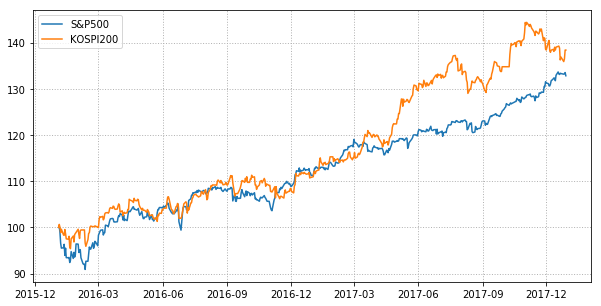

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(df_ratio_2016_now['S&P500'])
plt.plot(df_ratio_2016_now['KOSPI200'])
plt.legend(loc=0)
plt.grid(True, color='0.7', linestyle=':', linewidth=1)

Text(0,0.5,'KOSPI200')

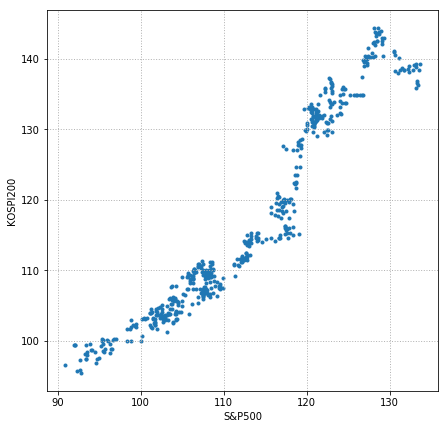

In [52]:
plt.figure(figsize=(7,7))
plt.scatter(df_ratio_2016_now['S&P500'], df_ratio_2016_now['KOSPI200'], marker='.')
plt.grid(True, color='0.7', linestyle=':', linewidth=1)
plt.xlabel('S&P500')
plt.ylabel('KOSPI200')

In [53]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = df_ratio_2016_now['S&P500']
y = df_ratio_2016_now['KOSPI200']

# 1개 컬럼 np.array로 변환
independent_var = np.array(x).reshape(-1, 1)
dependent_var = np.array(y).reshape(-1, 1)

# Linear Regression
regr = LinearRegression()
regr.fit(independent_var, dependent_var)

result = {'Slope':regr.coef_[0,0], 'Intercept':regr.intercept_[0], 'R^2':regr.score(independent_var, dependent_var) }
result

{'Slope': 1.2880889473807509,
 'Intercept': -28.225702646637544,
 'R^2': 0.9210659719797479}

Text(0,0.5,'KOSPI200')

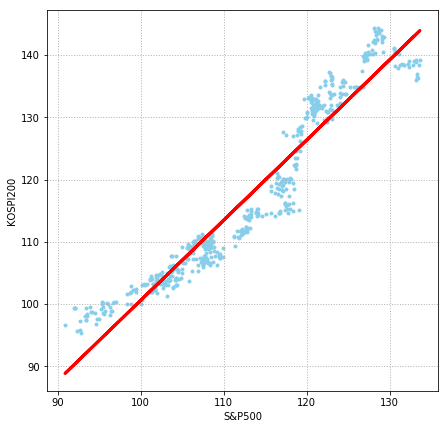

In [54]:
plt.figure(figsize=(7,7))
plt.scatter(independent_var, dependent_var, marker='.', color='skyblue')
plt.plot(independent_var, regr.predict(independent_var), color='r', linewidth=3)
plt.grid(True, color='0.7', linestyle=':', linewidth=1)
plt.xlabel('S&P500')
plt.ylabel('KOSPI200')